In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import earthaccess
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# veritable buffet for marine microbes

In [3]:
auth = earthaccess.login()

In [4]:
tspan = ("2025-01-07", "2025-01-30")
bbox = (-131.9569, 29.4430, -100.8539, 37.9144) # west, south, east, north


In [7]:
# results_land = earthaccess.search_data(
#     short_name="PACE_SPEXONE_L2_AER_RTAPLAND",
#     temporal=tspan,
#     bounding_box=bbox
# )
# len(results_land)

# results_oean = earthaccess.search_data(
#     short_name="PACE_SPEXONE_L2_AER_RTAPOCEAN",
#     temporal=tspan,
#     bounding_box=bbox
# )
# len(results_oean)

results_L3 = earthaccess.search_data(
    short_name="PACE_SPEXONE_L3M_AER_RTAP",
    temporal=tspan,
    bounding_box=bbox,
    granule_name="*.DAY.*0p1deg*",  # Daily only for MOANA | Resolution: 0p1deg or 4 (for 4km)

)
len(results_L3)



KeyboardInterrupt



In [ ]:
# paths_land = earthaccess.open(results_land)
# paths_ocean = earthaccess.open(results_oean)
path_spex=earthaccess.open(results_L3)

In [11]:

def time_from_attr(ds):
    """Set the time attribute as a dataset variable
    Args:
        ds: a dataset corresponding to one or multiple Level-2 granules
    Returns:
        the dataset with a scalar "time" coordinate
    """
    datetime = ds.attrs["time_coverage_start"].replace("Z", "")
    ds["date"] = ((), np.datetime64(datetime, "ns"))
    ds = ds.set_coords("date")
    return ds



# for i in range(
    
# datatree = xr.open_datatree(paths_ocean[0])
# dataset = xr.merge(datatree.to_dict().values())


# # data = xr.open_mfdataset(paths_land,concat_dim='time',combine='nested')
# # dataset = xr.merge(data.to_dict().values())
# xr.open_mfdataset(paths,
#     combine="nested",
#     concat_dim="date"
# )


In [7]:
dataset_spex = xr.open_mfdataset(path_spex, combine="nested",preprocess=preprocess, concat_dim="date")
ds_subset = dataset_spex.sel(
    lon=slice(bbox[0], bbox[2]),
    lat=slice(bbox[3], bbox[1])  # note: lat is usually north→south, so reverse order
)

ssa_data=ds_subset["ssa"].mean('date').sel(wavelength='550')

NameError: name 'preprocess' is not defined

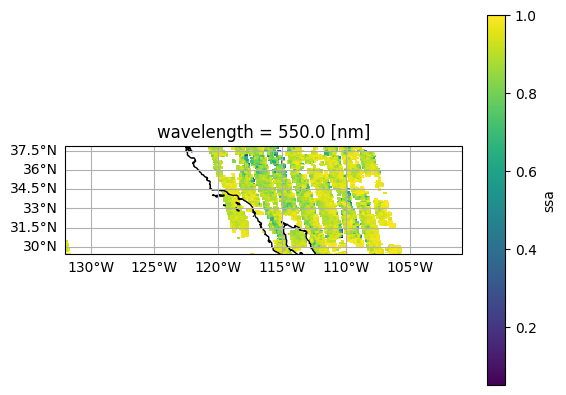

In [34]:

fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels={"left": "y", "bottom": "x"})
plot = ssa_data.plot( cmap="viridis",  ax=ax
)

In [19]:
from pathlib import Path

import cartopy.crs as ccrs
import earthaccess
import matplotlib.pyplot as plt
import numpy as np
import requests
import xarray as xr
from glob import glob
from datetime import datetime
import pdb

target_date = datetime(2025,1,5)
oci_dir = '/home/jovyan/shared-public/FirePhytos_DustBlumes/PACE_OCI_AOD/*'
files = sorted(glob(oci_dir + target_date.strftime('*%Y%m*')))
#files = sorted(glob(oci_dir))
print(len(files))
# pdb.set_trace()
#dataset_spex = xr.open_mfdataset(files, combine="nested",preprocess=time_from_attr, concat_dim="date")
# dataset = dataset.set_coords(("latitude", "longitude"))
# chla = chla.rio.set_spatial_dims("pixels_per_line", "number_of_lines")
# chla = chla.rio.write_crs("epsg:4326")


170


In [20]:
# aods = []
# ssas = []
# lons = []
# lats = []
# ssas_dt=[]
# AIs=[]
# for file in files:

#     datatree = xr.open_datatree(file)
#     dataset = xr.merge(datatree.to_dict().values())
#     dataset = dataset.set_coords(("latitude", "longitude"))
    
#     lon = np.array(dataset['longitude'])
#     lat = np.array(dataset['latitude'])
#     aod = np.squeeze(np.array(dataset['Aerosol_Optical_Depth'][:,:,3]))
#     # fmf = np.squeeze(np.array(dataset['Aerosol_Optical_Depth'][:,:,3]))
#     ssa_388_dt = np.squeeze(np.array(dataset['DT_AerosolSingleScattAlbedo'][:,:,2]))
#     ssa_388_nuv = np.squeeze(np.array(dataset['NUV_AerosolSingleScattAlbedo'][:,:,3]))
#     AI = np.squeeze(np.array(dataset['NUV_AerosolIndex']))

    
#     lons.append(lon)
#     lats.append(lat)
#     aods.append(aod)
#     ssas.append(ssa_388_nuv)
#     ssas_dt.append(ssa_388_dt)
#     AIs.append(AI)

# # aods=np.nanmean(aods,axis=0)    
# # ssas=np.nanmean(ssas,axis=0)    
# # lons=np.nanmean(lons,axis=0)    
# # lats=np.nanmean(lats,axis=0)    

    

In [82]:
from pathlib import Path

import cartopy.crs as ccrs
import earthaccess
import matplotlib.pyplot as plt
import numpy as np
import requests
import xarray as xr
from glob import glob
from datetime import datetime
import pdb

target_date = datetime(2025,1,5)
oci_dir = '/home/jovyan/shared-public/FirePhytos_DustBlumes/PACE_OCI_AOD/*'
files = sorted(glob(oci_dir + target_date.strftime('*%Y%m*')))
#files = sorted(glob(oci_dir))
print(len(files))
# pdb.set_trace()
#dataset_spex = xr.open_mfdataset(files, combine="nested",preprocess=time_from_attr, concat_dim="date")
# dataset = dataset.set_coords(("latitude", "longitude"))
# chla = chla.rio.set_spatial_dims("pixels_per_line", "number_of_lines")
# chla = chla.rio.write_crs("epsg:4326")
import numpy as np
import xarray as xr
from glob import glob
from datetime import datetime, timedelta

# --- Helper to extract date from filename ---
def get_file_date(file):
    # Example: PACE_OCI.20250107T184551.L2.AER_UAA.V3_0.NRT.nc
    basename = file.split("/")[-1]
    date_str = basename.split(".")[1][:8]  # '20250107'
    return datetime.strptime(date_str, "%Y%m%d")

# --- Group files by week ---
week_groups = {}
for file in files:
    date = get_file_date(file)
    
    # Compute "week number" starting from Jan 1
    year_start = datetime(date.year, 1, 1)
    week_num = ((date - year_start).days // 7) + 1  # week 1 = Jan 1-6, week 2 = Jan 7-13, etc.
    
    if week_num not in week_groups:
        week_groups[week_num] = []
    week_groups[week_num].append(file)
aod_mean = []
lons_weekly = []
lats_weekly = []
ssa_mean = []
ai_mean = []

aods_total = []
ssas_total = []
lons = []
lats = []
ssas_dt = []
AIs_total = []

# --- Process each week separately ---
for week_num, week_files in week_groups.items():
    aods = []
    ssas = []
    lonss = []
    latss = []
    ssas_dt = []
    AIs = []
    
    for file in week_files:
        try:
            datatree = xr.open_datatree(file)
            dataset = xr.merge(datatree.to_dict().values())
            dataset = dataset.set_coords(("latitude", "longitude"))

            lon = np.array(dataset['longitude'])
            lat = np.array(dataset['latitude'])
            aod = np.squeeze(np.array(dataset['Aerosol_Optical_Depth'][:, :, 3]))
            ssa_388_dt = np.squeeze(np.array(dataset['DT_AerosolSingleScattAlbedo'][:, :, 2]))
            ssa_388_nuv = np.squeeze(np.array(dataset['NUV_AerosolSingleScattAlbedo'][:, :, 3]))
            AI = np.squeeze(np.array(dataset['NUV_AerosolIndex']))

            lons.append(lon)
            lats.append(lat)
            aods.append(aod)
            ssas.append(ssa_388_nuv)
            ssas_dt.append(ssa_388_dt)
            AIs.append(AI)
            
            aods_total.append(aod)
            ssas_total.append(ssa_388_nuv)
            AIs_total.append(AI)

        except Exception as e:
            print(f"Skipping {file}: {e}")

    # --- Compute weekly means ---
    aod_mean.append(np.nanmean(aods, axis=0))
    ssa_mean.append(np.nanmean(ssas, axis=0))
    ai_mean.append(np.nanmean(AIs, axis=0))
AOD = np.mean(aod_mean,axis=0)
SSA = np.mean(ssa_mean,axis=0)
AI = np.mean(ai_mean,axis=0)

    # print(f"Week {week_num} ({len(week_files)} files):")
    # print(f"AOD mean shape: {aod_mean.shape}")

    # You can now call your plot function here if you want:
    # plot_l2_product(lons, lats, [aod_mean], plot_range=plot_range, title=f"AOD Mean Week {week_num}", vmin=0, vmax=0.3, cmap="jet")


170


/tmp/ipykernel_423/783363163.py:97: RuntimeWarning: Mean of empty slice
  aod_mean.append(np.nanmean(aods, axis=0))
/tmp/ipykernel_423/783363163.py:98: RuntimeWarning: Mean of empty slice
  ssa_mean.append(np.nanmean(ssas, axis=0))
/tmp/ipykernel_423/783363163.py:97: RuntimeWarning: Mean of empty slice
  aod_mean.append(np.nanmean(aods, axis=0))
/tmp/ipykernel_423/783363163.py:98: RuntimeWarning: Mean of empty slice
  ssa_mean.append(np.nanmean(ssas, axis=0))
/tmp/ipykernel_423/783363163.py:97: RuntimeWarning: Mean of empty slice
  aod_mean.append(np.nanmean(aods, axis=0))
/tmp/ipykernel_423/783363163.py:98: RuntimeWarning: Mean of empty slice
  ssa_mean.append(np.nanmean(ssas, axis=0))
/tmp/ipykernel_423/783363163.py:97: RuntimeWarning: Mean of empty slice
  aod_mean.append(np.nanmean(aods, axis=0))
/tmp/ipykernel_423/783363163.py:98: RuntimeWarning: Mean of empty slice
  ssa_mean.append(np.nanmean(ssas, axis=0))
/tmp/ipykernel_423/783363163.py:97: RuntimeWarning: Mean of empty slice


In [ ]:
target_date = datetime(2024,12,5)

oci_dir = '/home/jovyan/shared-public/FirePhytos_DustBlumes/PACE_OCI_AOD/*'
files = sorted(glob(oci_dir + target_date.strftime('*%Y%m*')))

# --- Helper to extract date from filename ---
def get_file_date(file):
    # Example: PACE_OCI.20250107T184551.L2.AER_UAA.V3_0.NRT.nc
    basename = file.split("/")[-1]
    date_str = basename.split(".")[1][:8]  # '20250107'
    return datetime.strptime(date_str, "%Y%m%d")

# --- Group files by week ---
week_groups = {}
for file in files:
    date = get_file_date(file)
    
    # Compute "week number" starting from Jan 1
    year_start = datetime(date.year, 1, 1)
    week_num = ((date - year_start).days // 7) + 1  # week 1 = Jan 1-6, week 2 = Jan 7-13, etc.
    
    if week_num not in week_groups:
        week_groups[week_num] = []
    week_groups[week_num].append(file)
aod_mean_Dec = []
lons_weekly_Dec = []
lats_weekly_Dec = []
ssa_mean_Dec = []
ai_mean_Dec = []

# --- Process each week separately ---
for week_num, week_files in week_groups.items():
    aods_Dec = []
    ssas_Dec = []
    lons_Dec = []
    lats_Dec = []
    ssas_dt_Dec = []
    AIs_Dec = []
    
    for file in week_files:
        try:
            datatree = xr.open_datatree(file)
            dataset = xr.merge(datatree.to_dict().values())
            dataset = dataset.set_coords(("latitude", "longitude"))

            lon_Dec = np.array(dataset['longitude'])
            lat_Dec = np.array(dataset['latitude'])
            aod = np.squeeze(np.array(dataset['Aerosol_Optical_Depth'][:, :, 3]))
            ssa_388_dt = np.squeeze(np.array(dataset['DT_AerosolSingleScattAlbedo'][:, :, 2]))
            ssa_388_nuv = np.squeeze(np.array(dataset['NUV_AerosolSingleScattAlbedo'][:, :, 3]))
            AI = np.squeeze(np.array(dataset['NUV_AerosolIndex']))

            lons_Dec.append(lon)
            lats_Dec.append(lat)
            aods_Dec.append(aod)
            ssas_Dec.append(ssa_388_nuv)
            ssas_dt_Dec.append(ssa_388_dt)
            AIs_Dec.append(AI)
        except Exception as e:
            print(f"Skipping {file}: {e}")

    # --- Compute weekly means ---
    aod_mean_Dec.append(np.nanmean(aods, axis=0))
    ssa_mean_Dec.append(np.nanmean(ssas, axis=0))
    ai_mean_Dec.append(np.nanmean(AIs, axis=0))
AOD_Dec = np.mean(aod_mean_Dec,axis=0)
SSA_Dec = np.mean(ssa_mean_Dec,axis=0)
AI_Dec = np.mean(ai_mean_Dec,axis=0)

laty = np.nanmean(lats,axis=0)
lony = np.nanmean(lons,axis=0)
    # print(f"Week {week_num} ({len(week_files)} files):")
    # print(f"AOD mean shape: {aod_mean.shape}")

    # You can now call your plot function here if you want:
    # plot_l2_product(lons, lats, [aod_mean], plot_range=plot_range, title=f"AOD Mean Week {week_num}", vmin=0, vmax=0.3, cmap="jet")


In [68]:
import matplotlib.colors as mcolors
import copy

def plot_l2_product(
    lon, lat, data, plot_range, label, title, vmin, vmax, figsize=(12, 4), cmap="jet", mask_black=False):

    # --- If masking for black ---
    if mask_black:
        cmap_orig = plt.get_cmap(cmap)
        cmap_mod = copy.copy(cmap_orig)
        cmap_mod.set_over('black')  # values above vmax will be black
    else:
       #cmap_mod = cmap
        cmap_orig = plt.get_cmap(cmap)
        cmap_mod = copy.copy(cmap_orig)
        cmap_mod.set_over('red')  # values above vmax will be black

    fig = plt.figure(figsize=figsize)
    gs = fig.add_gridspec(1, 2, width_ratios=[3, 1], wspace=0.3)

    ax_map = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
    ax_map.set_extent(plot_range, crs=ccrs.PlateCarree())
    ax_map.coastlines(resolution="110m", color="black", linewidth=1)
    ax_map.gridlines(draw_labels=True)
    ax_map.set_title(title, fontsize=12)

    for i in range(len(data)):
        pm = ax_map.pcolormesh(
            lon[i], lat[i], data[i],
            vmin=vmin, vmax=vmax, cmap=cmap_mod,
            transform=ccrs.PlateCarree()
        )

    plt.colorbar(pm, ax=ax_map, orientation="vertical", pad=0.1, label=label)

    # --- Add major city names ---
    cities = {
        "San Francisco": (-122.4194, 37.7749),
        "Los Angeles": (-118.2437, 34.0522),
        "San Diego": (-117.1611, 32.7157),
    }
    for city, (lon_c, lat_c) in cities.items():
        ax_map.text(lon_c, lat_c, city,
                    transform=ccrs.PlateCarree(),
                    fontsize=10, fontweight='bold',
                    color='black',
                    ha='center', va='center',
                    bbox=dict(facecolor='white', alpha=0.6, boxstyle='round,pad=0.2'))

    plt.tight_layout()
    plt.show()

import matplotlib.colors as mcolors
import copy

def plot_l2_product_ssa(
    lon, lat, data, plot_range, label, title, vmin, vmax, figsize=(12, 4), cmap="jet", mask_black=False):

    # --- If masking for black ---
    if mask_black:
        cmap_orig = plt.get_cmap(cmap)
        cmap_mod = copy.copy(cmap_orig)
        cmap_mod.set_over('black')  # values above vmax will be black
    else:
       #cmap_mod = cmap
        cmap_orig = plt.get_cmap(cmap)
        cmap_mod = copy.copy(cmap_orig)
        cmap_mod.set_over('red')  # values above vmax will be black

    fig = plt.figure(figsize=figsize)
    gs = fig.add_gridspec(1, 2, width_ratios=[3, 1], wspace=0.3)

    ax_map = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
    ax_map.set_extent(plot_range, crs=ccrs.PlateCarree())
    ax_map.coastlines(resolution="110m", color="black", linewidth=1)
    ax_map.gridlines(draw_labels=True)
    ax_map.set_title(title, fontsize=12)

    for i in range(len(data)):
        pm = ax_map.pcolormesh(
            lon[i], lat[i], data[i],
            vmin=vmin, vmax=vmax, cmap=cmap_mod,
            transform=ccrs.PlateCarree()
        )

    plt.colorbar(pm, ax=ax_map, orientation="vertical", pad=0.1, label=label)

    # --- Add major city names ---
    cities = {
        "San Francisco": (-122.4194, 37.7749),
        "Los Angeles": (-118.2437, 34.0522),
        "San Diego": (-117.1611, 32.7157),
    }
    for city, (lon_c, lat_c) in cities.items():
        ax_map.text(lon_c, lat_c, city,
                    transform=ccrs.PlateCarree(),
                    fontsize=10, fontweight='bold',
                    color='black',
                    ha='center', va='center',
                    bbox=dict(facecolor='white', alpha=0.6, boxstyle='round,pad=0.2'))

    plt.tight_layout()
    plt.show
    #plt.savefig('', dpi=300, bbox_inches='tight')


In [12]:
# from pathlib import Path

# import cartopy.crs as ccrs
# import earthaccess
# import matplotlib.pyplot as plt
# import numpy as np
# import requests
# import xarray as xr
# from glob import glob
# from datetime import datetime
# import pdb

# target_date = datetime(2024,12,5)

# oci_dir = '/home/jovyan/shared-public/FirePhytos_DustBlumes/PACE_OCI_AOD/*'
# files = sorted(glob(oci_dir + target_date.strftime('*%Y%m*')))
# #files = sorted(glob(oci_dir))
# print(len(files))
# # pdb.set_trace()
# #dataset_spex = xr.open_mfdataset(files, combine="nested",preprocess=time_from_attr, concat_dim="date")

# ssas_dt_Dec=[]
# aods_Dec = []
# ssas_Dec = []
# lons_Dec = []
# lats_Dec = []
# AIs_Dec=[]
# for file in files:

#     datatree = xr.open_datatree(file)
#     dataset = xr.merge(datatree.to_dict().values())
#     lon = np.array(dataset['longitude'])
#     lat = np.array(dataset['latitude'])
#     aod = np.squeeze(np.array(dataset['Aerosol_Optical_Depth'][:,:,3]))
#     # fmf = np.squeeze(np.array(dataset['Aerosol_Optical_Depth'][:,:,3]))
#     ssa_388_dt = np.squeeze(np.array(dataset['DT_AerosolSingleScattAlbedo'][:,:,2]))
#     ssa_388_nuv = np.squeeze(np.array(dataset['NUV_AerosolSingleScattAlbedo'][:,:,3]))
#     AI = np.squeeze(np.array(dataset['NUV_AerosolIndex']))

#     lons_Dec.append(lon)
#     lats_Dec.append(lat)
#     aods_Dec.append(aod)
#     ssas_Dec.append(ssa_388_nuv)
#     ssas_dt_Dec.append(ssa_388_dt)
#     AIs_Dec.append(AI)
# # aods=np.nanmean(aods,axis=0)    
# # ssas=np.nanmean(ssas,axis=0)    
# # lons=np.nanmean(lons,axis=0)    
# # lats=np.nanmean(lats,axis=0)    



226


/tmp/ipykernel_146/1126569404.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


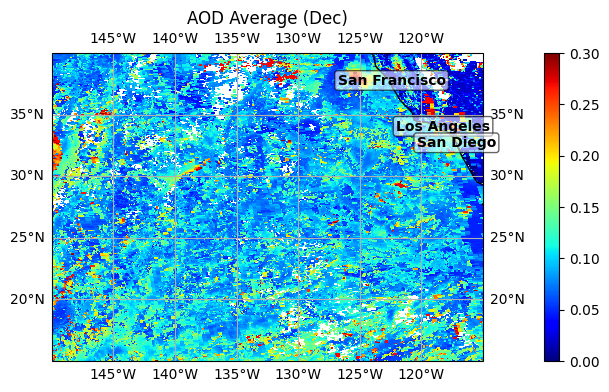

/tmp/ipykernel_146/1126569404.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


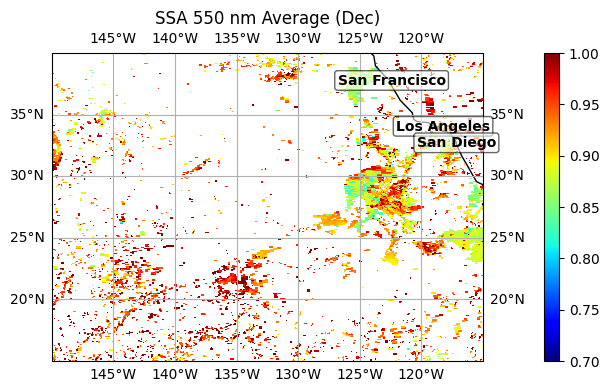

/tmp/ipykernel_146/1126569404.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


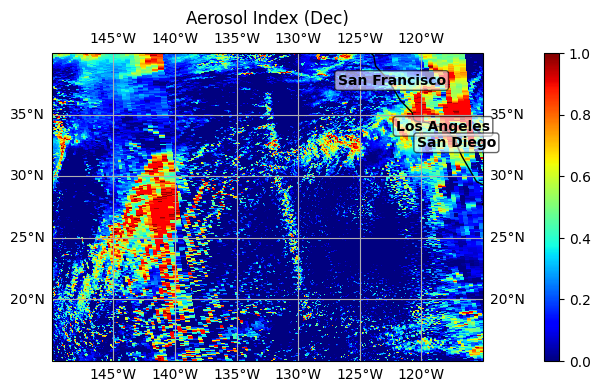

In [13]:
plot_range=[np.float32(-115), # east
 np.float32(-150), # west
 np.float32(15), # south
 np.float32(40)] # north

plot_l2_product(lons, lats,
aods, plot_range=plot_range, label='', title="AOD Average (Jan)", vmin=0, vmax=0.3, 
                 cmap="jet")

# plot_l2_product(lon, lat,
# ssa_388_dt, plot_range=plot_range, label='', title='DT_SSA', vmin=0.7, vmax=1, 
#                 fn=target_date.strftime('PACE_OCI_DTSSA_%Y%m%d.png'), cmap="jet")

plot_l2_product(
    lons, lats, ssas,
    plot_range=plot_range,
    label='', title='SSA 550 nm Average (Jan)',
    vmin=0.7, vmax=0.95, cmap="jet",  # vmax set to 0.95
    mask_black=True
)

plot_l2_product(lons, lats,
AIs, plot_range=plot_range, label='', title='Aerosol Index (Jan)', vmin=0, vmax=1, 
                cmap="jet")


plot_l2_product_ssa(
    lons, lats, ssas,
    plot_range=plot_range,
    label='', title='SSA 550 nm Average (Jan)',
    vmin=0.7, vmax=0.95, cmap="jet",  # vmax set to 0.95
    mask_black=True
)


plot_range=[np.float32(-115),
 np.float32(-150),
 np.float32(15),
 np.float32(40)]

plot_l2_product(lons, lats,
aods, plot_range=plot_range, label='', title="AOD Average (Dec)", vmin=0, vmax=0.3, 
                 cmap="jet")

# plot_l2_product(lon, lat,
# ssa_388_dt, plot_range=plot_range, label='', title='DT_SSA', vmin=0.7, vmax=1, 
#                 fn=target_date.strftime('PACE_OCI_DTSSA_%Y%m%d.png'), cmap="jet")

plot_l2_product(lons, lats,
ssas, plot_range=plot_range, label='', title='SSA 550 nm Average (Dec)', vmin=0.7, vmax=1, 
                cmap="jet")

plot_l2_product(lons, lats,
AIs, plot_range=plot_range, label='', title='Aerosol Index (Dec)', vmin=0, vmax=1, 
                cmap="jet")
    

In [136]:
# import numpy as np
# import xarray as xr
# from glob import glob
# import cartopy.crs as ccrs
# import matplotlib.pyplot as plt
# from scipy.spatial import cKDTree

# # -------------------------------
# # Define target grid for bbox
# # -------------------------------
# lat_res = 0.1
# lon_res = 0.1
# lat_grid = np.arange(15, 40 + lat_res, lat_res)
# lon_grid = np.arange(-150, -115 + lon_res, lon_res)
# lon_target, lat_target = np.meshgrid(lon_grid, lat_grid)

# # KDTree for fast nearest neighbour lookup
# target_points = np.column_stack((lat_target.ravel(), lon_target.ravel()))
# tree_target = cKDTree(target_points)

# # -------------------------------
# # Prepare storage arrays
# # -------------------------------
# nlat, nlon = lat_target.shape
# aod_stack = []
# ssa_stack = []
# ai_stack = []

# # -------------------------------
# # Loop over each file
# # -------------------------------
# oci_dir = '/home/jovyan/shared-public/FirePhytos_DustBlumes/PACE_OCI_AOD/'
# files = sorted(glob(oci_dir + '*202412*'))
# #files = sorted(glob(oci_dir + '*202501*'))

# print(f"Found {len(files)} files.")

# for file in files:
#     try:
#         datatree = xr.open_datatree(file)
#         dataset = xr.merge(datatree.to_dict().values())

#         lon = np.array(dataset['longitude'])
#         lat = np.array(dataset['latitude'])

#         aod = np.squeeze(dataset['Aerosol_Optical_Depth'][:, :, 3].values)
#         ssa = np.squeeze(dataset['NUV_AerosolSingleScattAlbedo'][:, :, 3].values)
#         ai  = np.squeeze(dataset['NUV_AerosolIndex'].values)

#         # Flatten
#         orig_points = np.column_stack((lat.ravel(), lon.ravel()))
#         aod_flat = aod.ravel()
#         ssa_flat = ssa.ravel()
#         ai_flat = ai.ravel()

#         # Mask NaNs from AOD
#         mask = ~np.isnan(aod_flat)
#         orig_points = orig_points[mask]
#         aod_flat = aod_flat[mask]
#         ssa_flat = ssa_flat[mask]
#         ai_flat = ai_flat[mask]

#         # Find nearest neighbour in target grid
#         _, idx_target = tree_target.query(orig_points, k=1)

#         # Allocate to a grid
#         aod_grid = np.full((nlat, nlon), np.nan)
#         ssa_grid = np.full((nlat, nlon), np.nan)
#         ai_grid  = np.full((nlat, nlon), np.nan)

#         for i, idx in enumerate(idx_target):
#             iy, ix = np.unravel_index(idx, (nlat, nlon))
#             aod_grid[iy, ix] = aod_flat[i]
#             ssa_grid[iy, ix] = ssa_flat[i]
#             ai_grid[iy, ix]  = ai_flat[i]

#         # Append for time averaging
#         aod_stack.append(aod_grid)
#         ssa_stack.append(ssa_grid)
#         ai_stack.append(ai_grid)

#     except Exception as e:
#         print(f"Skipping file {file}: {e}")

# aod_mean_dec = np.nanmean(aod_stack, axis=0)
# ssa_mean_dec = np.nanmean(ssa_stack, axis=0)
# ai_mean_dec  = np.nanmean(ai_stack, axis=0)

import numpy as np
import xarray as xr
from glob import glob
from datetime import datetime, timedelta
from scipy.spatial import cKDTree

# -------------------------------
# Target grid
# -------------------------------
lat_res = 0.1
lon_res = 0.1
lat_grid = np.arange(15, 40 + lat_res, lat_res)
lon_grid = np.arange(-150, -115 + lon_res, lon_res)
lon_target, lat_target = np.meshgrid(lon_grid, lat_grid)
nlat, nlon = lat_target.shape

# Build KDTree for nearest neighbour
target_points = np.column_stack((lat_target.ravel(), lon_target.ravel()))
tree_target = cKDTree(target_points)

# -------------------------------
# Files and grouping by week
# -------------------------------
target_date = datetime(2025, 1, 5)
oci_dir = '/home/jovyan/shared-public/FirePhytos_DustBlumes/PACE_OCI_AOD/'

files = sorted(glob(oci_dir + target_date.strftime('*%Y%m*')))
print(f"Found {len(files)} files.")

def get_file_date(file):
    basename = file.split("/")[-1]
    date_str = basename.split(".")[1][:8]  # YYYYMMDD
    return datetime.strptime(date_str, "%Y%m%d")

week_groups = {}
for file in files:
    date = get_file_date(file)
    year_start = datetime(date.year, 1, 1)
    week_num = ((date - year_start).days // 7) + 1
    week_groups.setdefault(week_num, []).append(file)

print(f"Weeks found: {list(week_groups.keys())}")

# -------------------------------
# Allocate arrays for weekly means + dates
# -------------------------------
nweeks = len(week_groups)
AOD_weekly_Jan = np.full((nweeks, nlat, nlon), np.nan)
SSA_weekly_Jan = np.full((nweeks, nlat, nlon), np.nan)
AI_weekly_Jan  = np.full((nweeks, nlat, nlon), np.nan)
week_dates_Jan = []  # Store (start_date, end_date)

# -------------------------------
# Process each week
# -------------------------------
for wi, (week_num, week_files) in enumerate(sorted(week_groups.items())):
    week_dates_Jan.append((get_file_date(week_files[0]),
                       get_file_date(week_files[-1])))
    print(f"\nProcessing week {week_num} ({len(week_files)} files) "
          f"{week_dates_Jan[-1][0].strftime('%Y-%m-%d')} → {week_dates_Jan[-1][1].strftime('%Y-%m-%d')}")
    
    aod_stack = []
    ssa_stack = []
    ai_stack  = []

    for file in week_files:
        try:
            datatree = xr.open_datatree(file)
            dataset = xr.merge(datatree.to_dict().values())

            lon = np.array(dataset['longitude'])
            lat = np.array(dataset['latitude'])

            aod = np.squeeze(dataset['Aerosol_Optical_Depth'][:, :, 3].values)
            ssa = np.squeeze(dataset['NUV_AerosolSingleScattAlbedo'][:, :, 3].values)
            ai  = np.squeeze(dataset['NUV_AerosolIndex'].values)

            # Flatten and mask NaNs
            orig_points = np.column_stack((lat.ravel(), lon.ravel()))
            mask = ~np.isnan(aod.ravel())
            orig_points = orig_points[mask]
            aod_flat = aod.ravel()[mask]
            ssa_flat = ssa.ravel()[mask]
            ai_flat  = ai.ravel()[mask]

            # Nearest neighbour mapping
            _, idx_target = tree_target.query(orig_points, k=1)

            aod_grid = np.full((nlat, nlon), np.nan)
            ssa_grid = np.full((nlat, nlon), np.nan)
            ai_grid  = np.full((nlat, nlon), np.nan)

            for pi, idx in enumerate(idx_target):
                iy, ix = np.unravel_index(idx, (nlat, nlon))
                aod_grid[iy, ix] = aod_flat[pi]
                ssa_grid[iy, ix] = ssa_flat[pi]
                ai_grid[iy, ix]  = ai_flat[pi]

            aod_stack.append(aod_grid)
            ssa_stack.append(ssa_grid)
            ai_stack.append(ai_grid)

        except Exception as e:
            print(f"Skipping {file}: {e}")

    # Store weekly mean
    AOD_weekly_Jan[wi, :, :] = np.nanmean(aod_stack, axis=0)
    SSA_weekly_Jan[wi, :, :] = np.nanmean(ssa_stack, axis=0)
    AI_weekly_Jan[wi, :, :]  = np.nanmean(ai_stack, axis=0)

print("\n✅ Weekly regridded arrays created.")
print(f"AOD_weekly shape: {AOD_weekly_Jan.shape}")
print("Week date ranges:")
for i, (start, end) in enumerate(week_dates_Jan):
    print(f"Week {i+1}: {start} → {end}")
# --------------------------------
# 2024
import numpy as np
import xarray as xr
from glob import glob
from datetime import datetime, timedelta
from scipy.spatial import cKDTree

# -------------------------------
# Target grid
# -------------------------------
lat_res = 0.1
lon_res = 0.1
lat_grid = np.arange(15, 40 + lat_res, lat_res)
lon_grid = np.arange(-150, -115 + lon_res, lon_res)
lon_target, lat_target = np.meshgrid(lon_grid, lat_grid)
nlat, nlon = lat_target.shape

# Build KDTree for nearest neighbour
target_points = np.column_stack((lat_target.ravel(), lon_target.ravel()))
tree_target = cKDTree(target_points)

# -------------------------------
# Files and grouping by week
# -------------------------------
target_date = datetime(2024, 12, 5)
oci_dir = '/home/jovyan/shared-public/FirePhytos_DustBlumes/PACE_OCI_AOD/'

files = sorted(glob(oci_dir + target_date.strftime('*%Y%m*')))
print(f"Found {len(files)} files.")

def get_file_date(file):
    basename = file.split("/")[-1]
    date_str = basename.split(".")[1][:8]  # YYYYMMDD
    return datetime.strptime(date_str, "%Y%m%d")

week_groups = {}
for file in files:
    date = get_file_date(file)
    year_start = datetime(date.year, 1, 1)
    week_num = ((date - year_start).days // 7) + 1
    week_groups.setdefault(week_num, []).append(file)

print(f"Weeks found: {list(week_groups.keys())}")

# -------------------------------
# Allocate arrays for weekly means + dates
# -------------------------------
nweeks = len(week_groups)
AOD_weekly_Dec = np.full((nweeks, nlat, nlon), np.nan)
SSA_weekly_Dec = np.full((nweeks, nlat, nlon), np.nan)
AI_weekly_Dec  = np.full((nweeks, nlat, nlon), np.nan)
week_dates_Dec = []  # Store (start_date, end_date)

# -------------------------------
# Process each week
# -------------------------------
for wi, (week_num, week_files) in enumerate(sorted(week_groups.items())):
    week_dates_Dec.append((get_file_date(week_files[0]),
                       get_file_date(week_files[-1])))
    print(f"\nProcessing week {week_num} ({len(week_files)} files) "
          f"{week_dates_Dec[-1][0].strftime('%Y-%m-%d')} → {week_dates_Dec[-1][1].strftime('%Y-%m-%d')}")
    
    aod_stack = []
    ssa_stack = []
    ai_stack  = []

    for file in week_files:
        try:
            datatree = xr.open_datatree(file)
            dataset = xr.merge(datatree.to_dict().values())

            lon = np.array(dataset['longitude'])
            lat = np.array(dataset['latitude'])

            aod = np.squeeze(dataset['Aerosol_Optical_Depth'][:, :, 3].values)
            ssa = np.squeeze(dataset['NUV_AerosolSingleScattAlbedo'][:, :, 3].values)
            ai  = np.squeeze(dataset['NUV_AerosolIndex'].values)

            # Flatten and mask NaNs
            orig_points = np.column_stack((lat.ravel(), lon.ravel()))
            mask = ~np.isnan(aod.ravel())
            orig_points = orig_points[mask]
            aod_flat = aod.ravel()[mask]
            ssa_flat = ssa.ravel()[mask]
            ai_flat  = ai.ravel()[mask]

            # Nearest neighbour mapping
            _, idx_target = tree_target.query(orig_points, k=1)

            aod_grid = np.full((nlat, nlon), np.nan)
            ssa_grid = np.full((nlat, nlon), np.nan)
            ai_grid  = np.full((nlat, nlon), np.nan)

            for pi, idx in enumerate(idx_target):
                iy, ix = np.unravel_index(idx, (nlat, nlon))
                aod_grid[iy, ix] = aod_flat[pi]
                ssa_grid[iy, ix] = ssa_flat[pi]
                ai_grid[iy, ix]  = ai_flat[pi]

            aod_stack.append(aod_grid)
            ssa_stack.append(ssa_grid)
            ai_stack.append(ai_grid)

        except Exception as e:
            print(f"Skipping {file}: {e}")

    # Store weekly mean
    AOD_weekly_Dec[wi, :, :] = np.nanmean(aod_stack, axis=0)
    SSA_weekly_Dec[wi, :, :] = np.nanmean(ssa_stack, axis=0)
    AI_weekly_Dec[wi, :, :]  = np.nanmean(ai_stack, axis=0)

print(" Weekly regridded arrays created.")
print(f"AOD_weekly shape: {AOD_weekly_Dec.shape}")
print("Week date ranges:")
for i, (start, end) in enumerate(week_dates_Dec):
    print(f"Week {i+1}: {start} → {end}")


Found 170 files.
Weeks found: [1, 2, 3, 4, 5]

Processing week 1 (9 files) 2025-01-07 → 2025-01-07


/tmp/ipykernel_423/3195549030.py:195: RuntimeWarning: Mean of empty slice
  AOD_weekly_Jan[wi, :, :] = np.nanmean(aod_stack, axis=0)
/tmp/ipykernel_423/3195549030.py:196: RuntimeWarning: Mean of empty slice
  SSA_weekly_Jan[wi, :, :] = np.nanmean(ssa_stack, axis=0)
/tmp/ipykernel_423/3195549030.py:197: RuntimeWarning: Mean of empty slice
  AI_weekly_Jan[wi, :, :]  = np.nanmean(ai_stack, axis=0)



Processing week 2 (56 files) 2025-01-08 → 2025-01-14


/tmp/ipykernel_423/3195549030.py:195: RuntimeWarning: Mean of empty slice
  AOD_weekly_Jan[wi, :, :] = np.nanmean(aod_stack, axis=0)
/tmp/ipykernel_423/3195549030.py:196: RuntimeWarning: Mean of empty slice
  SSA_weekly_Jan[wi, :, :] = np.nanmean(ssa_stack, axis=0)
/tmp/ipykernel_423/3195549030.py:197: RuntimeWarning: Mean of empty slice
  AI_weekly_Jan[wi, :, :]  = np.nanmean(ai_stack, axis=0)



Processing week 3 (30 files) 2025-01-15 → 2025-01-21


/tmp/ipykernel_423/3195549030.py:195: RuntimeWarning: Mean of empty slice
  AOD_weekly_Jan[wi, :, :] = np.nanmean(aod_stack, axis=0)
/tmp/ipykernel_423/3195549030.py:196: RuntimeWarning: Mean of empty slice
  SSA_weekly_Jan[wi, :, :] = np.nanmean(ssa_stack, axis=0)
/tmp/ipykernel_423/3195549030.py:197: RuntimeWarning: Mean of empty slice
  AI_weekly_Jan[wi, :, :]  = np.nanmean(ai_stack, axis=0)



Processing week 4 (53 files) 2025-01-22 → 2025-01-28


/tmp/ipykernel_423/3195549030.py:195: RuntimeWarning: Mean of empty slice
  AOD_weekly_Jan[wi, :, :] = np.nanmean(aod_stack, axis=0)
/tmp/ipykernel_423/3195549030.py:196: RuntimeWarning: Mean of empty slice
  SSA_weekly_Jan[wi, :, :] = np.nanmean(ssa_stack, axis=0)
/tmp/ipykernel_423/3195549030.py:197: RuntimeWarning: Mean of empty slice
  AI_weekly_Jan[wi, :, :]  = np.nanmean(ai_stack, axis=0)



Processing week 5 (22 files) 2025-01-29 → 2025-01-31


/tmp/ipykernel_423/3195549030.py:195: RuntimeWarning: Mean of empty slice
  AOD_weekly_Jan[wi, :, :] = np.nanmean(aod_stack, axis=0)
/tmp/ipykernel_423/3195549030.py:196: RuntimeWarning: Mean of empty slice
  SSA_weekly_Jan[wi, :, :] = np.nanmean(ssa_stack, axis=0)
/tmp/ipykernel_423/3195549030.py:197: RuntimeWarning: Mean of empty slice
  AI_weekly_Jan[wi, :, :]  = np.nanmean(ai_stack, axis=0)



✅ Weekly regridded arrays created.
AOD_weekly shape: (5, 251, 351)
Week date ranges:
Week 1: 2025-01-07 00:00:00 → 2025-01-07 00:00:00
Week 2: 2025-01-08 00:00:00 → 2025-01-14 00:00:00
Week 3: 2025-01-15 00:00:00 → 2025-01-21 00:00:00
Week 4: 2025-01-22 00:00:00 → 2025-01-28 00:00:00
Week 5: 2025-01-29 00:00:00 → 2025-01-31 00:00:00
Found 226 files.
Weeks found: [48, 49, 50, 51, 52, 53]

Processing week 48 (9 files) 2024-12-01 → 2024-12-01


/tmp/ipykernel_423/3195549030.py:312: RuntimeWarning: Mean of empty slice
  AOD_weekly_Dec[wi, :, :] = np.nanmean(aod_stack, axis=0)
/tmp/ipykernel_423/3195549030.py:313: RuntimeWarning: Mean of empty slice
  SSA_weekly_Dec[wi, :, :] = np.nanmean(ssa_stack, axis=0)
/tmp/ipykernel_423/3195549030.py:314: RuntimeWarning: Mean of empty slice
  AI_weekly_Dec[wi, :, :]  = np.nanmean(ai_stack, axis=0)



Processing week 49 (34 files) 2024-12-02 → 2024-12-08


/tmp/ipykernel_423/3195549030.py:312: RuntimeWarning: Mean of empty slice
  AOD_weekly_Dec[wi, :, :] = np.nanmean(aod_stack, axis=0)
/tmp/ipykernel_423/3195549030.py:313: RuntimeWarning: Mean of empty slice
  SSA_weekly_Dec[wi, :, :] = np.nanmean(ssa_stack, axis=0)
/tmp/ipykernel_423/3195549030.py:314: RuntimeWarning: Mean of empty slice
  AI_weekly_Dec[wi, :, :]  = np.nanmean(ai_stack, axis=0)



Processing week 50 (59 files) 2024-12-09 → 2024-12-15


/tmp/ipykernel_423/3195549030.py:312: RuntimeWarning: Mean of empty slice
  AOD_weekly_Dec[wi, :, :] = np.nanmean(aod_stack, axis=0)
/tmp/ipykernel_423/3195549030.py:313: RuntimeWarning: Mean of empty slice
  SSA_weekly_Dec[wi, :, :] = np.nanmean(ssa_stack, axis=0)
/tmp/ipykernel_423/3195549030.py:314: RuntimeWarning: Mean of empty slice
  AI_weekly_Dec[wi, :, :]  = np.nanmean(ai_stack, axis=0)



Processing week 51 (52 files) 2024-12-16 → 2024-12-21


/tmp/ipykernel_423/3195549030.py:312: RuntimeWarning: Mean of empty slice
  AOD_weekly_Dec[wi, :, :] = np.nanmean(aod_stack, axis=0)
/tmp/ipykernel_423/3195549030.py:313: RuntimeWarning: Mean of empty slice
  SSA_weekly_Dec[wi, :, :] = np.nanmean(ssa_stack, axis=0)
/tmp/ipykernel_423/3195549030.py:314: RuntimeWarning: Mean of empty slice
  AI_weekly_Dec[wi, :, :]  = np.nanmean(ai_stack, axis=0)



Processing week 52 (54 files) 2024-12-23 → 2024-12-29


/tmp/ipykernel_423/3195549030.py:312: RuntimeWarning: Mean of empty slice
  AOD_weekly_Dec[wi, :, :] = np.nanmean(aod_stack, axis=0)
/tmp/ipykernel_423/3195549030.py:313: RuntimeWarning: Mean of empty slice
  SSA_weekly_Dec[wi, :, :] = np.nanmean(ssa_stack, axis=0)
/tmp/ipykernel_423/3195549030.py:314: RuntimeWarning: Mean of empty slice
  AI_weekly_Dec[wi, :, :]  = np.nanmean(ai_stack, axis=0)



Processing week 53 (18 files) 2024-12-30 → 2024-12-31
 Weekly regridded arrays created.
AOD_weekly shape: (6, 251, 351)
Week date ranges:
Week 1: 2024-12-01 00:00:00 → 2024-12-01 00:00:00
Week 2: 2024-12-02 00:00:00 → 2024-12-08 00:00:00
Week 3: 2024-12-09 00:00:00 → 2024-12-15 00:00:00
Week 4: 2024-12-16 00:00:00 → 2024-12-21 00:00:00
Week 5: 2024-12-23 00:00:00 → 2024-12-29 00:00:00
Week 6: 2024-12-30 00:00:00 → 2024-12-31 00:00:00


/tmp/ipykernel_423/3195549030.py:312: RuntimeWarning: Mean of empty slice
  AOD_weekly_Dec[wi, :, :] = np.nanmean(aod_stack, axis=0)
/tmp/ipykernel_423/3195549030.py:313: RuntimeWarning: Mean of empty slice
  SSA_weekly_Dec[wi, :, :] = np.nanmean(ssa_stack, axis=0)
/tmp/ipykernel_423/3195549030.py:314: RuntimeWarning: Mean of empty slice
  AI_weekly_Dec[wi, :, :]  = np.nanmean(ai_stack, axis=0)


In [ ]:
n=4
week_dates[n]
# (datetime.datetime(2024, 12, 5), datetime.datetime(2024, 12, 11))

plt.pcolormesh(lon_target, lat_target, AOD_weekly[0], cmap="jet", vmin=0, vmax=0.3)
plt.colorbar(label="AOD 550 nm")
plt.title(f"AOD Mean {week_dates[n][0].strftime('%d %b')} → {week_dates[n][1].strftime('%d %b')}")
plt.show()


In [226]:
# -------------------------------
# Time mean
# -------------------------------

# -------------------------------
# Plotting function
# -------------------------------
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def plot_field(data, title, vmin, vmax, cmap,save_path=None):
    fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()}, figsize=(8, 6))
    
    # Plot data
    pcm = ax.pcolormesh(
        lon_target, lat_target, data,
        cmap=cmap, vmin=vmin, vmax=vmax,
        transform=ccrs.PlateCarree()
    )
    
    # Coastlines & features
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.set_extent([-150, -115, 15, 40], crs=ccrs.PlateCarree())
    ax.set_title(title)
    
    # Add gridlines with coordinates
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.7, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 9}
    gl.ylabel_style = {'size': 9}
    
    # --- Add major city names ---
    cities = {
        "San Francisco": (-122.4194, 37.7749),
        "Los Angeles": (-118.2437, 34.0522),
        "San Diego": (-117.1611, 32.7157),
    }
    for city, (lon_c, lat_c) in cities.items():
        ax.text(lon_c, lat_c, city,
                transform=ccrs.PlateCarree(),
                fontsize=10, fontweight='bold',
                color='black',
                ha='center', va='center',
                bbox=dict(facecolor='white', alpha=0.6, boxstyle='round,pad=0.2'))
    
    # Colorbar
    plt.colorbar(pcm, ax=ax, label="Relative Change (% percentrage)")
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches="tight")
        print(f"Saved figure to {save_path}")

    plt.show()

# aod_masked = np.where(aod_mean < 0.06, np.nan, aod_mean)

# # -------------------------------
# # Plot results
# # -------------------------------
# plot_field(aod_mean_jan, "Monthly Mean AOD (550 nm)", 0, 0.3, "jet")
# plot_field(ssa_mean_jan, "Monthly Mean SSA (NUV)", 0.7, 1.0, "jet")
# plot_field(ai_mean_jan, "Monthly Mean Aerosol Index", 0, 1, "RdBu_r")


/tmp/ipykernel_423/3644361465.py:1: RuntimeWarning: Mean of empty slice
  diff = np.nanmean(AOD_weekly_Jan,axis=0) - np.nanmean(AOD_weekly_Dec,axis=0)
/tmp/ipykernel_423/3644361465.py:2: RuntimeWarning: Mean of empty slice
  diff=((np.nanmean(AOD_weekly_Jan,axis=0) / np.nanmean(AOD_weekly_Dec,axis=0))-1) *100


Saved figure to /home/jovyan/shared-public/FirePhytos_DustBlumes/AOD_January_Anomalies.png


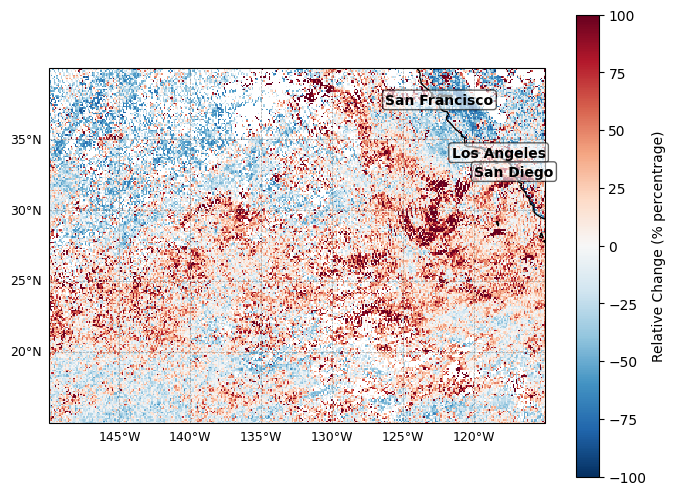

In [227]:
diff = np.nanmean(AOD_weekly_Jan,axis=0) - np.nanmean(AOD_weekly_Dec,axis=0)
diff=((np.nanmean(AOD_weekly_Jan,axis=0) / np.nanmean(AOD_weekly_Dec,axis=0))-1) *100

# Mask values between -0.1 and 0.1
#diff_masked = np.where((diff > -0.02) & (diff < 0.02), np.nan, diff)

plot_field(diff, "", -100, 100, "RdBu_r","/home/jovyan/shared-public/FirePhytos_DustBlumes/AOD_January_Anomalies.png")



/tmp/ipykernel_423/1804809312.py:86: RuntimeWarning: Mean of empty slice
  diff_data=AOD_weekly_Jan - np.nanmean(AOD_weekly_Dec,axis=0)
/tmp/ipykernel_423/1804809312.py:87: RuntimeWarning: Mean of empty slice
  diff_data=((AOD_weekly_Jan / np.nanmean(AOD_weekly_Dec,axis=0))-1) *100


Saved figure to /home/jovyan/shared-public/FirePhytos_DustBlumes/AOD_weekly_Jan.png


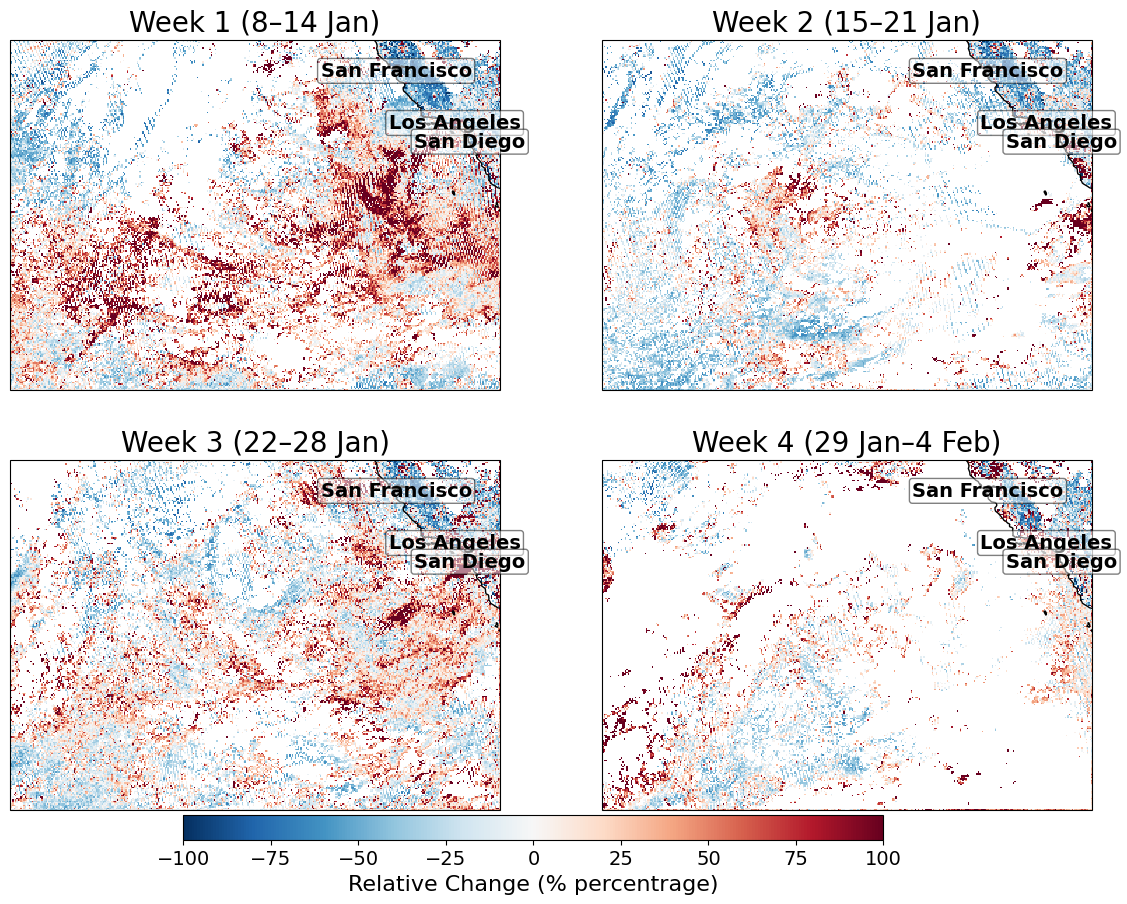

In [215]:
# Example: AOD_weekly_Jan is your list of 2D arrays per week
# Replace None for weeks without data
week_dates = [
    "1–7 Jan", "8–14 Jan", "15–21 Jan", "22–28 Jan", "29 Jan–4 Feb",
    "", "", "", ""  # Fill extra weeks if needed
]
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def plot_weekly_grid_2x2(data_list, week_dates, lon_target, lat_target, title, vmin, vmax, cmap, save_path=None):
    """
    Plot up to 4 weeks in a 2x2 subplot grid.

    data_list: list of 2D arrays (nlat, nlon) for each week
    week_dates: list of date strings or week labels
    lon_target, lat_target: 2D meshgrid for coordinates
    vmin, vmax: color scale limits
    """
    fig, axes = plt.subplots(
        2, 2, figsize=(14, 10),
        subplot_kw={"projection": ccrs.PlateCarree()}
    )

    axes = axes.flatten()
    pcm = None

    for i in range(4):
        ax = axes[i]

        if i < len(data_list) and data_list[i] is not None:
            pcm = ax.pcolormesh(
                lon_target, lat_target, data_list[i],
                cmap=cmap, vmin=vmin, vmax=vmax,
                transform=ccrs.PlateCarree()
            )
        else:
            ax.set_facecolor("lightgray")

        # Map features
        ax.coastlines()
        ax.add_feature(cfeature.BORDERS, linestyle=':')
        ax.set_extent([-150, -115, 15, 40], crs=ccrs.PlateCarree())

        # Title
        if i < len(week_dates):
            ax.set_title(f"Week {i+1} ({week_dates[i]})", fontsize=20)
        else:
            ax.set_title(f"Week {i+1} (No Data)", fontsize=20)

        # Cities
        cities = {
            "San Francisco": (-122.4194, 37.7749),
            "Los Angeles": (-118.2437, 34.0522),
            "San Diego": (-117.1611, 32.7157),
        }
        for city, (lon_c, lat_c) in cities.items():
            ax.text(lon_c, lat_c, city,
                    transform=ccrs.PlateCarree(),
                    fontsize=14, fontweight='bold',
                    color='black', ha='center', va='center',
                    bbox=dict(facecolor='white', alpha=0.5, boxstyle='round,pad=0.15'))

    # Add colorbar
    if pcm:
        cbar_ax = fig.add_axes([0.25, 0.08, 0.5, 0.025])
        cbar = fig.colorbar(pcm, cax=cbar_ax, orientation="horizontal")
        cbar.set_label("Relative Change (% percentrage)", fontsize=16)
        cbar.ax.tick_params(labelsize=14)

    plt.suptitle(title, fontsize=20, y=0.96)

    # Save only if save_path provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches="tight")
        print(f"Saved figure to {save_path}")

    plt.show()


diff_data=AOD_weekly_Jan - np.nanmean(AOD_weekly_Dec,axis=0)
diff_data=((AOD_weekly_Jan / np.nanmean(AOD_weekly_Dec,axis=0))-1) *100

# plot_weekly_grid_5(
#     data_list=diff_data,
#     week_dates=week_dates,
#     lon_target=lon_target,
#     lat_target=lat_target,
#     title="January Weekly AOD (550 nm)",
#     vmin=-0.2, vmax=0.2,
#     cmap="RdBu_r"
plot_weekly_grid_2x2(
    data_list=diff_data[1:5],  # first 4 weeks with data
    week_dates=week_dates[1:5],
    lon_target=lon_target,
    lat_target=lat_target,
    title="",
    vmin=-100, vmax=100,
    cmap="RdBu_r",
    save_path="/home/jovyan/shared-public/FirePhytos_DustBlumes/AOD_weekly_Jan.png"
)


# week_dates = [
#     "1–7 Jan", "8–14 Jan", "15–21 Jan", "22–28 Jan", "29 Jan–4 Feb"
# ]

# diff_data_ssa=SSA_weekly_Jan - np.nanmean(SSA_weekly_Dec,axis=0)
# plot_weekly_grid_5(
#     data_list=SSA_weekly_Jan,
#     week_dates=week_dates,
#     lon_target=lon_target,
#     lat_target=lat_target,
#     title="January Weekly SSA (550 nm)",
#     vmin=0.7, vmax=1,
#     cmap="RdBu_r"
# )

# week_dates = [
#     "1–7 Jan", "8–14 Jan", "15–21 Jan", "22–28 Jan", "29 Jan–4 Feb"
# ]
# diff_data_ai=AI_weekly_Jan - np.nanmean(AI_weekly_Dec,axis=0)

# plot_weekly_grid_5(
#     data_list=diff_data_ai,
#     week_dates=week_dates,
#     lon_target=lon_target,
#     lat_target=lat_target,
#     title="January Weekly AI (550 nm)",
#     vmin=-1, vmax=1,
#     cmap="RdBu_r"
# )
